## La base est formée de 60 000 données d'apprentissage et de 10 0000 données de test.

## Chaque données représente : une image et le chiffre attendu.

## Chaque images est de taille 28 * 28 pixels.

## En 256 niveau de gris ( chaque pixel).


In [24]:

# ********** Pour télécharger le jeu de données ***************************

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(images_entrainement, labels_entrainement), (images_test, labels_test) = keras.datasets.mnist.load_data()




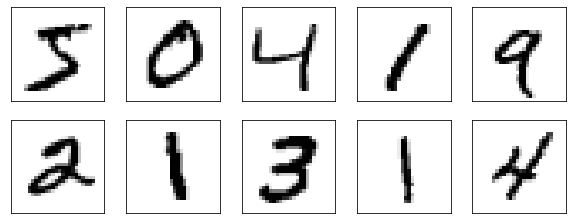

In [25]:

# ****************  Pour afficher les images d'entrainement *********************

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_entrainement[i], cmap=plt.cm.binary)

plt.show()


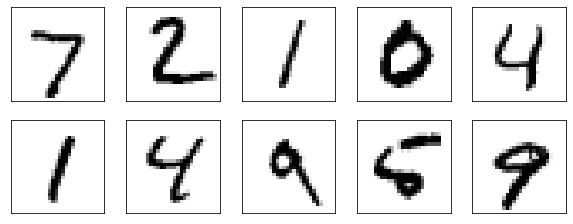

In [38]:
# ****************  Pour afficher les images de test *********************

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test[i], cmap=plt.cm.binary)

plt.show()

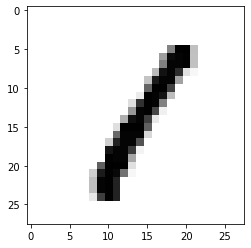

In [40]:

# ******************* Pour afficher une image d'entrainement [particulière] *******************

digit=images_entrainement[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [27]:


# ************** Préparer les données ******************************


num_classes = 10   # sortie correspondant de 0 à 9
input_shape = (28, 28, 1)  # tableau 28 x 28 de 0 à 255 

In [28]:


# **************************************
#    Convertissez les exemples de données d'entiers en nombres à virgule flottante :
#    Mettez ces valeurs à l'échelle dans une plage de 0 à 1 avant de les alimenter au modèle de réseau neuronal. 
#    Pour ce faire, divisez les valeurs par 255.
#    Il est important que l' ensemble d'apprentissage et
#    l' ensemble de test soient prétraités de la même manière :


images_entrainement = images_entrainement.astype("float32") / 255
images_test = images_test.astype("float32") / 255


In [29]:


#  les images sont de la forme (28, 28, 1)

images_entrainement = np.expand_dims(images_entrainement, -1)
images_test = np.expand_dims(images_test, -1)

print("images_entrainement shape:", images_entrainement.shape)
print(images_entrainement.shape[0], "images d'entrainement")
print(images_test.shape[0], "images de test")


images_entrainement shape: (60000, 28, 28, 1)
60000 images d'entrainement
10000 images de test


In [30]:

# ****   Convertir 

labels_entrainement = keras.utils.to_categorical(labels_entrainement, num_classes)
labels_test = keras.utils.to_categorical(labels_test, num_classes)


In [31]:


# ****************** Construire le model *****************************************



model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [32]:

# ********************* Visualisation de l'architecture ***********************

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [35]:

# *********************** Compilation du modele ******************$


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [36]:
model.fit(images_entrainement, labels_entrainement, batch_size=128, epochs=1, validation_split=0.1)

422/422 [==============================] - 38s 88ms/step - loss: 0.3627 - accuracy: 0.8877 - val_loss: 0.0767 - val_accuracy: 0.9785


In [41]:

# *****************************  Evaluation du model *********************************

score = model.evaluate(images_test, labels_test, verbose=1)
print("Valeur de l'erreur sur les données de test (loss) :" , score[0])
print("Précision sur les données de test (accuracy) :", score[1])


313/313 [==============================] - 2s 8ms/step - loss: 0.0807 - accuracy: 0.9756
Valeur de l'erreur sur les données de test (loss) : 0.08071764558553696
Précision sur les données de test (accuracy) : 0.975600004196167


In [21]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)


Epoch 1/7
  4/469 [..............................] - ETA: 9s - loss: 0.0025 - accuracy: 1.0000 

2022-08-25 19:02:47.088173: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 5s 11ms/step - loss: 0.0061 - accuracy: 0.9983
Epoch 2/7
469/469 [==============================] - 6s 12ms/step - loss: 0.0051 - accuracy: 0.9989
Epoch 3/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 4/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 5/7
469/469 [==============================] - 6s 12ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 6/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 7/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0014 - accuracy: 0.9997


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

2022-08-25 19:03:43.721092: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step - loss: 0.0850 - accuracy: 0.9830


In [34]:
print('test_acc:', test_acc)


NameError: name 'test_acc' is not defined